**Import dataset dari data yang sudah disediakan keras**

In [ ]:
from keras.datasets import mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [ ]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

**Contoh untuk Sequential Model**

In [ ]:
from tensorflow import keras
from keras.models import Sequential

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


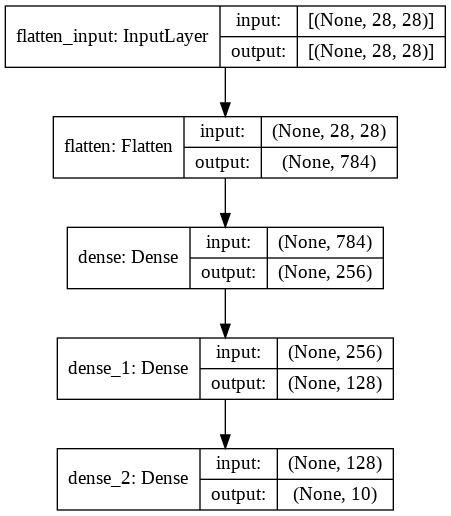

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0841 - accuracy: 0.7151 - val_loss: 0.3079 - val_accuracy: 0.9154
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3067 - accuracy: 0.9110 - val_loss: 0.2465 - val_accuracy: 0.9342
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2460 - accuracy: 0.9295 - val_loss: 0.2040 - val_accuracy: 0.9426
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2106 - accuracy: 0.9387 - val_loss: 0.1819 - val_accuracy: 0.9502
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1871 - accuracy: 0.9470 - val_loss: 0.1614 - val_accuracy: 0.9550
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1618 - accuracy: 0.9547 - val_loss: 0.1474 - val_accuracy: 0.9606
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1454 - accuracy: 0.9588 - val_loss: 0.1409 - val_accuracy:

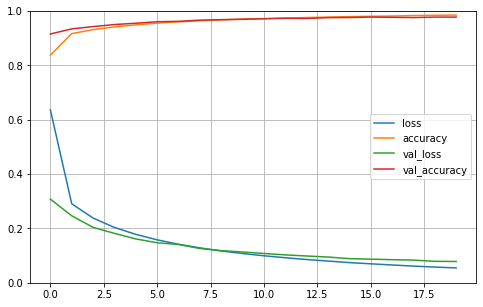

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

**Creating A Non Sequential / Functional API Model**

In [ ]:
input_ = keras.layers.Input(shape=[28, 28])
flatten = keras.layers.Flatten(input_shape=[28, 28])(input_)#2D -> 1D
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)#hidden layer #1
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)#hidden layer #2
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)#hidden layer #3
reshap = keras.layers.Reshape((28, 28))(hidden3)#1D -> 2D
concat_ = keras.layers.Concatenate()([input_, reshap])#gabung hasill hidden layer dan awal
flatten2 = keras.layers.Flatten(input_shape=[28, 28])(concat_)
output = keras.layers.Dense(10, activation='softmax')(flatten2)
model = keras.Model(inputs=[input_], outputs=[output])

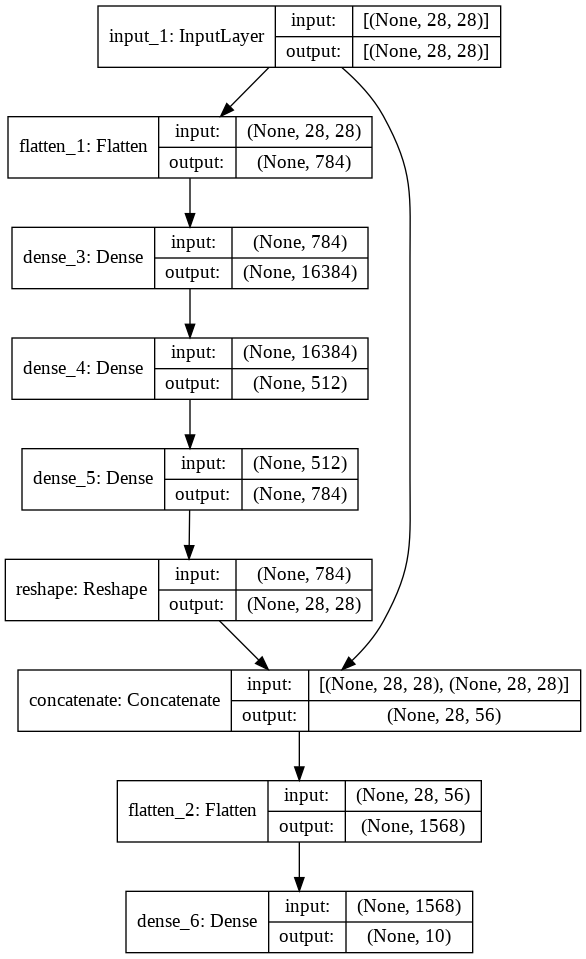

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 224s 130ms/step - loss: 0.9681 - accuracy: 0.7623 - val_loss: 0.2855 - val_accuracy: 0.9208
Epoch 2/10
1719/1719 [==============================] - 225s 131ms/step - loss: 0.2786 - accuracy: 0.9231 - val_loss: 0.2226 - val_accuracy: 0.9382
Epoch 3/10
1719/1719 [==============================] - 224s 130ms/step - loss: 0.2170 - accuracy: 0.9399 - val_loss: 0.1732 - val_accuracy: 0.9538
Epoch 4/10
1719/1719 [==============================] - 223s 130ms/step - loss: 0.1735 - accuracy: 0.9515 - val_loss: 0.1454 - val_accuracy: 0.9614
Epoch 5/10
1719/1719 [==============================] - 222s 129ms/step - loss: 0.1424 - accuracy: 0.9601 - val_loss: 0.1231 - val_accuracy: 0.9674
Epoch 6/10
1719/1719 [==============================] - 223s 130ms/step - loss: 0.1153 - accuracy: 0.9684 - val_loss: 0.1122 - val_accuracy: 0.9686
Epoch 7/10
1719/1719 [==============================] - 226s 131ms/step - loss: 0.0971 - accuracy: 0.9720 - val_

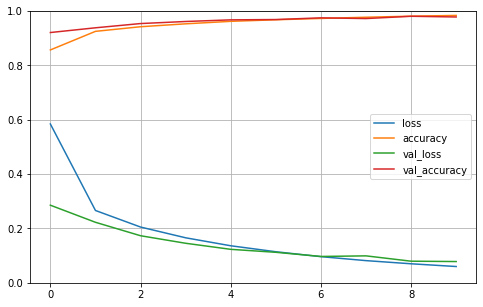

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [ ]:
input_A = keras.layers.Input(shape=[28, 28])
input_B = keras.layers.Input(shape=[28, 28])

flatten = keras.layers.Flatten(input_shape=[28, 28])(input_A)#2D -> 1D
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)#hidden layer #1
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)#hidden layer #2
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)#hidden layer #3
reshap = keras.layers.Reshape((28, 28))(hidden3)#1D -> 2D
concat_A = keras.layers.Concatenate()([input_A, reshap])#gabung hasil hidden layer dan awal
flatten_A = keras.layers.Flatten(input_shape=[28, 28])(concat_A)
output = keras.layers.Dense(10, activation='softmax')(flatten_A)


concat_B = keras.layers.Concatenate()([input_B, reshap])
flatten_B = keras.layers.Flatten(input_shape=[28, 28])(concat_B)

hidden_B = keras.layers.Dense(512, activation='relu')(flatten_B)
output_2nd = keras.layers.Dense(10, activation='softmax')(hidden_B)

In [ ]:
x_train_A, x_train_B = x_train[:-27500], x_train[-27500:]
y_train_A, y_train_B = y_train[:-27500], y_train[-27500:]

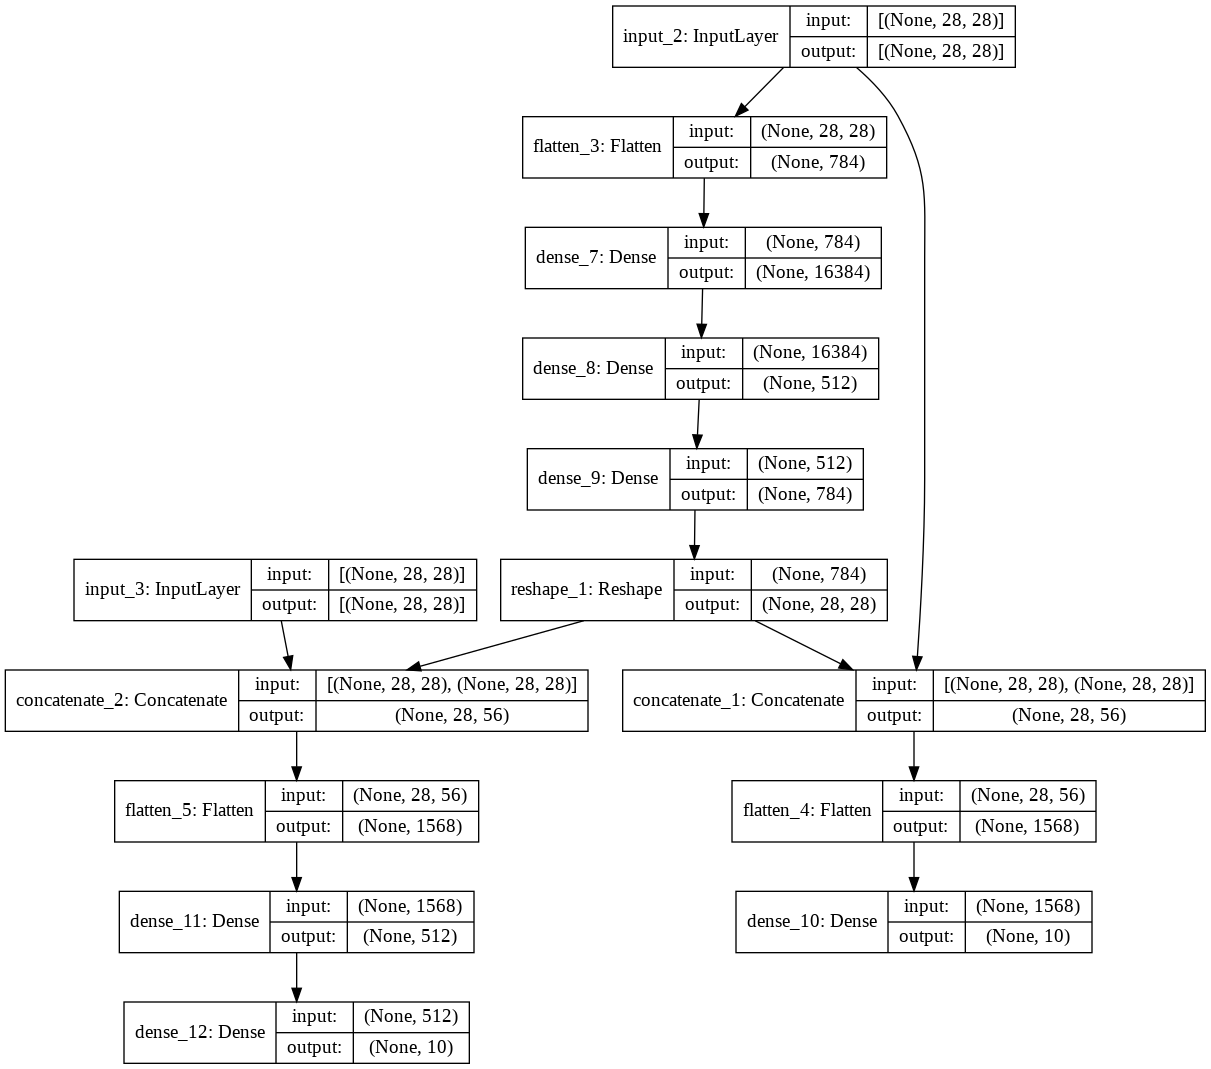

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model = keras.Model(inputs=[input_A, input_B], outputs=[output, output_2nd])

In [ ]:
model.compile(loss=["sparse_categorical_crossentropy", "sparse_categorical_crossentropy"],
                     optimizer="sgd", metrics=["accuracy"])

h = model.fit([x_train_A, x_train_B], [y_train_A, y_train_B], epochs=10, validation_split= 0.2 )

Epoch 1/10
688/688 [==============================] - 98s 142ms/step - loss: 2.7029 - dense_10_loss: 1.3216 - dense_12_loss: 1.3813 - dense_10_accuracy: 0.6778 - dense_12_accuracy: 0.6565 - val_loss: 0.9596 - val_dense_10_loss: 0.5123 - val_dense_12_loss: 0.4473 - val_dense_10_accuracy: 0.8682 - val_dense_12_accuracy: 0.8893
Epoch 2/10
688/688 [==============================] - 99s 144ms/step - loss: 0.9119 - dense_10_loss: 0.4249 - dense_12_loss: 0.4870 - dense_10_accuracy: 0.8927 - dense_12_accuracy: 0.8696 - val_loss: 0.7218 - val_dense_10_loss: 0.3802 - val_dense_12_loss: 0.3416 - val_dense_10_accuracy: 0.8900 - val_dense_12_accuracy: 0.9095
Epoch 3/10
688/688 [==============================] - 98s 143ms/step - loss: 0.7041 - dense_10_loss: 0.3161 - dense_12_loss: 0.3880 - dense_10_accuracy: 0.9131 - dense_12_accuracy: 0.8934 - val_loss: 0.6232 - val_dense_10_loss: 0.3264 - val_dense_12_loss: 0.2968 - val_dense_10_accuracy: 0.9058 - val_dense_12_accuracy: 0.9207
Epoch 4/10
688/688 

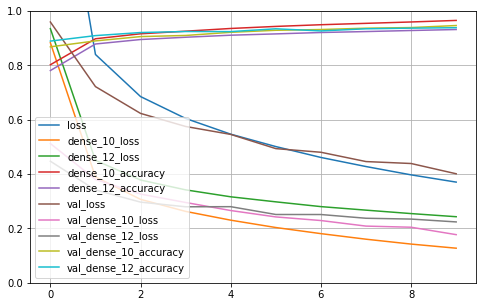

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()